In [1]:
import pandas as pd

filter for the mcrA sequences desired (if needed)

In [102]:
wgs = pd.read_csv('/Users/gracedai/Downloads/co2.csv')
prokka = pd.read_csv('/Users/gracedai/Downloads/prokkas.csv')
rumen_only = pd.read_csv('/Users/gracedai/Documents/asmg_labs_files/fasta_sequences/mcrA/rumen_only.csv')
wgs.head(n=10)

,organism_name,assembly_accession,strain,fwdA,fmdA,fwdB,fmdB,fwdC,fmdC,fwdD,...,hdrA2,hdrB2,hdrC2,hdrD,hdrE,mvhA,mvhG,mvhD,fdhA,fdhB
0,#CO2 -> methane,# KEGG M00567,#,K00200,K00200,K00201,K00201,K00202,K00202,K00203,...,K03388,K03389,K03390,K08264,K08265,K14126,K14128,K14127,K22516,K00125
1,#,#,#,formylmethanofuran dehydrogenase subunit A [EC...,formylmethanofuran dehydrogenase subunit A [EC...,formylmethanofuran dehydrogenase subunit B [EC...,formylmethanofuran dehydrogenase subunit B [EC...,formylmethanofuran dehydrogenase subunit C [EC...,formylmethanofuran dehydrogenase subunit C [EC...,formylmethanofuran dehydrogenase subunit D [EC...,...,heterodisulfide reductase subunit A2 [EC:1.8.7...,heterodisulfide reductase subunit B2 [EC:1.8.7...,heterodisulfide reductase subunit C2 [EC:1.8.7...,heterodisulfide reductase subunit D [EC:1.8.98.1],heterodisulfide reductase subunit E [EC:1.8.98.1],F420-non-reducing hydrogenase large subunit [E...,F420-non-reducing hydrogenase small subunit [E...,F420-non-reducing hydrogenase iron-sulfur subu...,formate dehydrogenase (coenzyme F420) alpha su...,formate dehydrogenase (coenzyme F420) beta sub...
2,Candidatus Methanogranum sp. U3.2.1,GCA_019262145.1,na,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Candidatus Methanoliparum sp. LAM-1,GCF_020885915.1,LAM-1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,Candidatus Methanomassiliicoccus intestinalis,GCF_902383905.1,na,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Candidatus Methanomassiliicoccus intestinalis ...,GCF_000404225.1,Issoire-Mx1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Candidatus Methanomethylophilus alvus,GCF_902387285.1,Mx1201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Candidatus Methanomethylophilus alvus,GCF_003711245.1,Mx-05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Candidatus Methanomethylophilus alvus Mx1201,GCF_000300255.2,Mx1201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Candidatus Methanomethylophilus sp. 1R26 (arch...,GCF_001481295.1,1R26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
out = pd.merge(rumen_only, wgs, on='assembly_accession', how='left')

In [ ]:
out['mcrA'] = out['mcrA'].fillna(0).astype(int)
out_mcrA = out[out['mcrA'] >= 1]
out_mcrA = out_mcrA[['assembly_accession', 'organism_name_x', 'strain_x','host', 'location', 'mcrA']]
out_mcrA

In [ ]:
out_mcrA.to_csv('out_mcrA.csv')

Analyze the Blast Results

In [8]:
import os 
os.chdir("/Users/gracedai/Documents/asmg_labs_files/fasta_sequences/mcrA")

In [107]:
df = pd.read_csv('mcrA_results2.txt', delimiter='\t')
df.columns = ['org_1', 'org_2', '%_identity', 'alignment_length', 'mismatches', 'gap_opens', 'start_1', 'end_1', 'start_2', 'end_2', 'e-value', 'bit_score']
df
#8724 rows 

,org_1,org_2,%_identity,alignment_length,mismatches,gap_opens,start_1,end_1,start_2,end_2,e-value,bit_score
0,GCA_019262145.1|Candidatus-Methanogranum|U3.2....,GCA_030168575.1|Methanomassiliicoccales-archae...,83.323,1655,260,14,19,1665,13,1659,0.000000e+00,1513.0
1,GCA_019262145.1|Candidatus-Methanogranum|U3.2....,GCF_000800805.1|Candidatus-Methanoplasma-termi...,82.367,1673,279,14,1,1665,1,1665,0.000000e+00,1441.0
2,GCA_019262145.1|Candidatus-Methanogranum|U3.2....,GCF_000300255.2|Candidatus-Methanomethylophilu...,81.473,1657,285,21,20,1665,20,1665,0.000000e+00,1339.0
3,GCA_019262145.1|Candidatus-Methanogranum|U3.2....,GCF_003711245.1|Candidatus-Methanomethylophilu...,81.473,1657,285,21,20,1665,20,1665,0.000000e+00,1339.0
4,GCA_019262145.1|Candidatus-Methanogranum|U3.2....,GCF_902387285.1|Candidatus-Methanomethylophilu...,81.473,1657,285,21,20,1665,20,1665,0.000000e+00,1339.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8965,GCA_902775005.1|uncultured-Methanobrevibacter|...,GCF_000012545.1|Methanosphaera-stadtmanae-|DSM...,74.772,1423,314,38,101,1502,1559,161,1.110000e-171,597.0
8966,GCA_902775005.1|uncultured-Methanobrevibacter|...,GCF_902384015.1|Methanosphaera-stadtmanae|na|1...,74.772,1423,314,38,101,1502,1559,161,1.110000e-171,597.0
8967,GCA_902775005.1|uncultured-Methanobrevibacter|...,GCF_001563245.1|Methanobrevibacter-olleyae|YLM...,72.280,1443,348,45,17,1436,1655,242,9.320000e-113,401.0
8968,GCA_902775005.1|uncultured-Methanobrevibacter|...,GCA_024167805.1|Methanobacterium|ERen5|2|16079...,71.352,1487,372,46,43,1505,43,1499,2.670000e-93,337.0


In [95]:
df2 = df[df['org_1'].str.strip() != df['org_2'].str.strip()]
#8432 rows
#strip of accession values into new columns
df2[['accession_1', 'org_1']] = df2['org_1'].str.split('|', 1, expand=True)
df2[['accession_2', 'org_2']] = df2['org_2'].str.split('|', 1, expand=True)
df2 = df2.sort_values(by=['%_identity','org_1', 'org_2'])
df2

/var/folders/y8/b4fxx0sj2sb2q868nv003_gm0000gn/T/ipykernel_61259/356484349.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2[['accession_1', 'org_1']] = df2['org_1'].str.split('|', 1, expand=True)
/var/folders/y8/b4fxx0sj2sb2q868nv003_gm0000gn/T/ipykernel_61259/356484349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['accession_1', 'org_1']] = df2['org_1'].str.split('|', 1, expand=True)
/var/folders/y8/b4fxx0sj2sb2q868nv003_gm0000gn/T/ipykernel_61259/356484349.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2[['accession_2', 'org_2']] = df2['org_2'

,org_1,org_2,%_identity,alignment_length,mismatches,gap_opens,start_1,end_1,start_2,end_2,e-value,bit_score,accession_1,accession_2
1899,Methanocaldococcus-jannaschii|DSM-2661|2|77182...,Methanocella-arvoryzae-|MRE50|1|1033346|1035016,69.019,836,226,27,250,1067,1413,593,1.790000e-15,78.7,GCF_000091665.1,GCF_000063445.1
2096,Methanocella-arvoryzae-|MRE50|1|1033346|1035016,Methanocaldococcus-jannaschii|DSM-2661|2|77182...,69.056,837,224,29,593,1413,1067,250,1.800000e-15,78.7,GCF_000063445.1,GCF_000091665.1
26,Candidatus-Methanogranum|U3.2.1|1|379430|381094,Methanonatronarchaeum|AMET-Sl|1|831958|833616,69.255,1288,316,68,220,1467,214,1461,1.770000e-25,111.0,GCA_019262145.1,GCF_029854155.1
4800,Methanonatronarchaeum|AMET-Sl|1|831958|833616,Candidatus-Methanogranum|U3.2.1|1|379430|381094,69.255,1288,316,69,214,1461,220,1467,1.770000e-25,111.0,GCF_029854155.1,GCA_019262145.1
4681,Methanomassiliicoccales-archaeon|LGM-RCC1|1|12...,Methanosarcina-thermophila|TM-1|1|1993626|1995341,69.499,1436,356,71,256,1641,292,1695,3.740000e-37,150.0,GCA_030168575.1,GCF_000969885.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,Methanothermobacter-thermautotrophicus|Delta-H...,Methanothermobacter-thermautotrophicus|Delta-H...,100.000,1653,0,0,1,1653,1,1653,0.000000e+00,3053.0,GCF_027554905.1,GCF_000008645.1
8334,Methanothermobacter-wolfeii|DSM-2970|2|1442881...,Methanothermobacter-wolfeii|SIV6|1|1442434|144...,100.000,1653,0,0,1,1653,1,1653,0.000000e+00,3053.0,GCF_025397995.1,GCA_900095815.1
8383,Methanothermobacter-wolfeii|SIV6|1|1442434|144...,Methanothermobacter-wolfeii|DSM-2970|2|1442881...,100.000,1653,0,0,1,1653,1,1653,0.000000e+00,3053.0,GCA_900095815.1,GCF_025397995.1
7567,Methanothermobacter|KEPCO-1|2|1100879|1102540,Methanothermobacter-marburgensis-|Marburg|1|13...,100.000,1662,0,0,1,1662,1662,1,0.000000e+00,3070.0,GCF_008033705.1,GCF_000145295.1


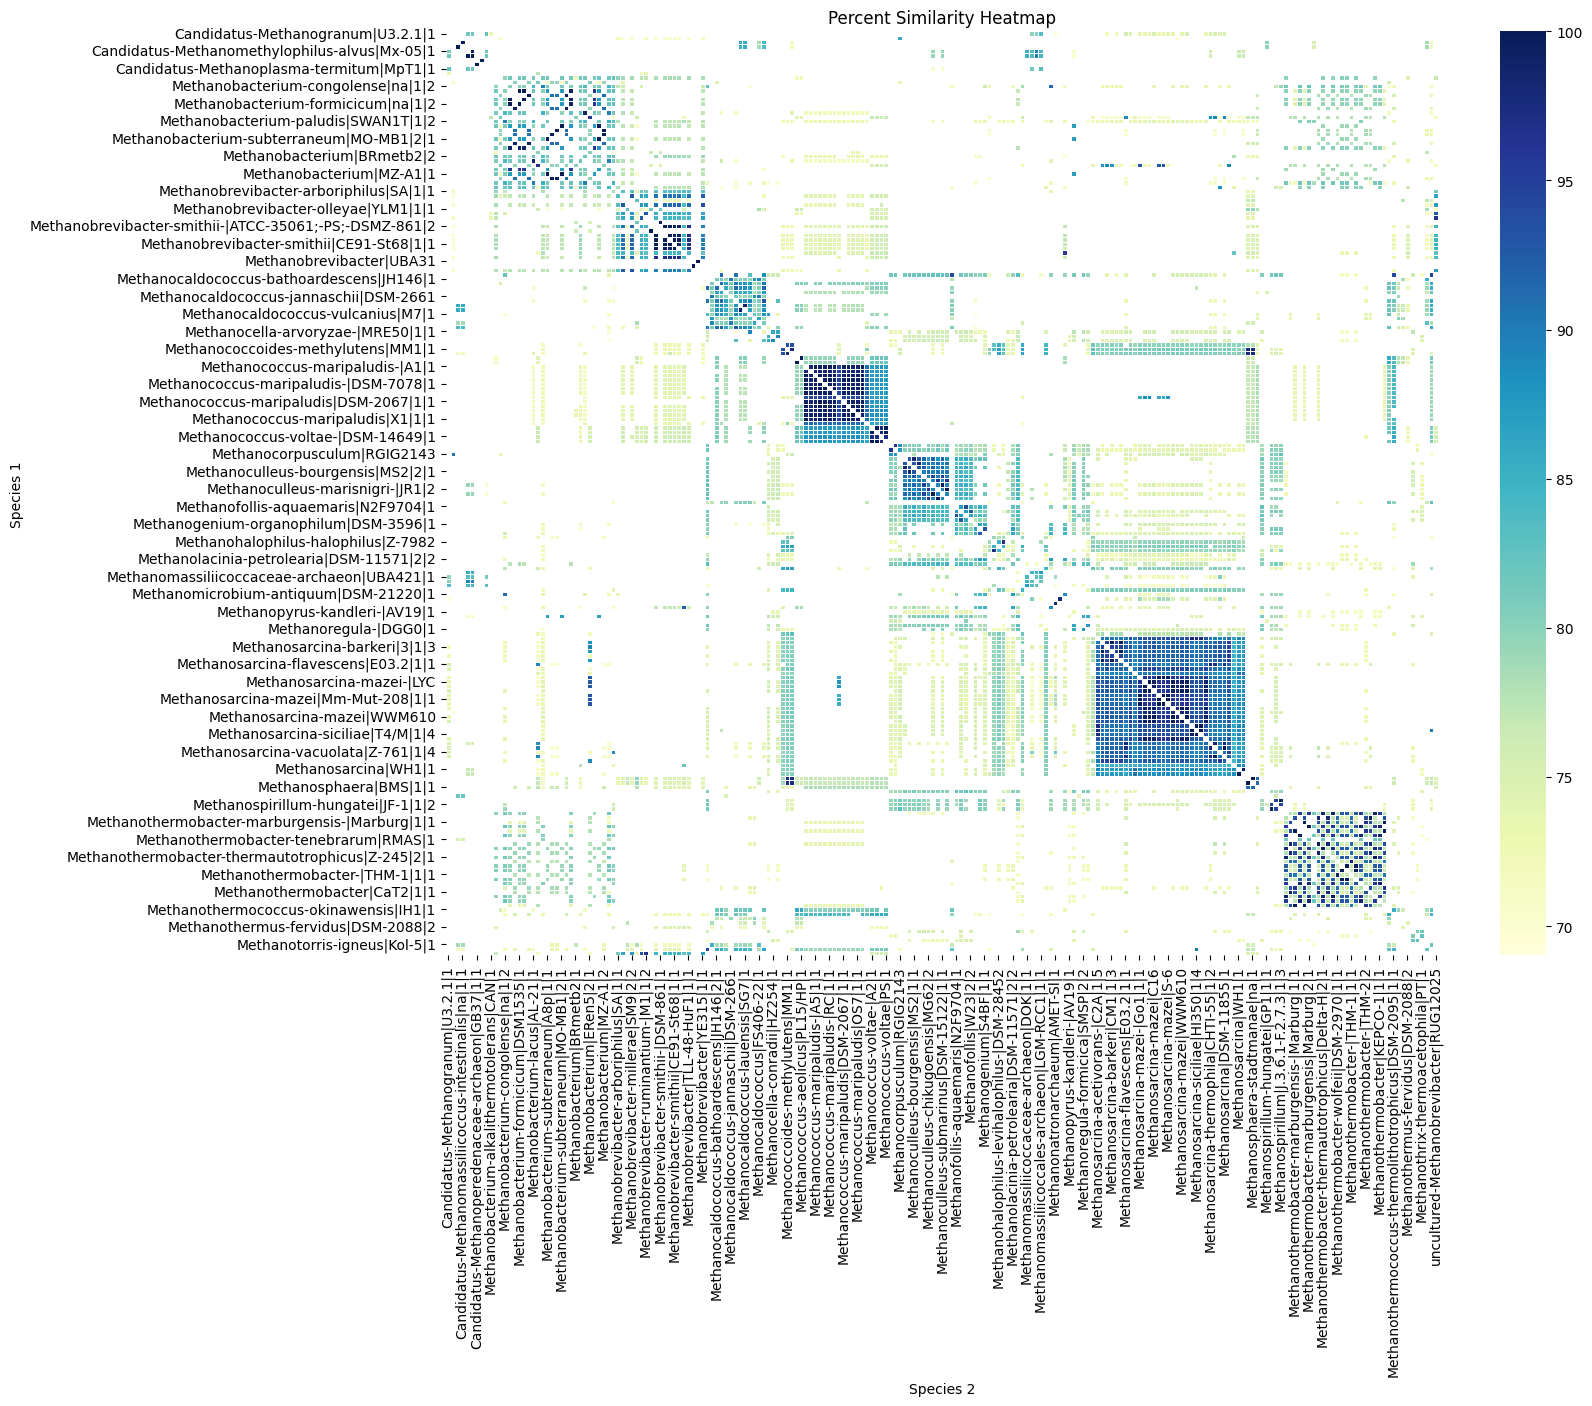

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df2 = df2.sort_values(by=['org_1', 'org_2'], ascending=[True, True])
df2['org_1'] = df2['org_1'].str[:-14]
df2['org_2'] = df2['org_2'].str[:-14]

#drop duplicates
df_no_dup = df2.drop_duplicates(subset=['org_1', 'org_2'], keep='first')
heatmap_data = df_no_dup.pivot(index='org_1', columns='org_2', values='%_identity')

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(data=heatmap_data, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Percent Similarity Heatmap')
plt.xlabel('Species 2')
plt.ylabel('Species 1')
plt.show()


In [109]:
#only take rows where first 15? char are the same (meaning same assembly accession)
df = df[df['org_1'].str.strip() != df['org_2'].str.strip()]
filtered_df = df[df['org_1'].str[:15] == df['org_2'].str[:15]]
filtered_df = filtered_df.sort_values(by=['%_identity'])
filtered_df

,org_1,org_2,%_identity,alignment_length,mismatches,gap_opens,start_1,end_1,start_2,end_2,e-value,bit_score
1324,GCF_001563245.1|Methanobrevibacter-olleyae|YLM...,GCF_001563245.1|Methanobrevibacter-olleyae|YLM...,73.893,1490,347,39,17,1488,1655,190,5.230000e-160,558.0
1296,GCF_001563245.1|Methanobrevibacter-olleyae|YLM...,GCF_001563245.1|Methanobrevibacter-olleyae|YLM...,73.960,1490,340,42,193,1655,1485,17,5.300000e-160,558.0
8566,GCF_000166095.1|Methanothermus-fervidus|DSM-20...,GCF_000166095.1|Methanothermus-fervidus|DSM-20...,74.424,1693,367,56,1,1661,1665,7,0.000000e+00,667.0
8555,GCF_000166095.1|Methanothermus-fervidus|DSM-20...,GCF_000166095.1|Methanothermus-fervidus|DSM-20...,74.439,1694,365,55,7,1665,1661,1,0.000000e+00,667.0
8358,GCF_025397995.1|Methanothermobacter-wolfeii|DS...,GCF_025397995.1|Methanothermobacter-wolfeii|DS...,76.214,1421,301,33,85,1488,88,1488,0.000000e+00,717.0
8331,GCF_025397995.1|Methanothermobacter-wolfeii|DS...,GCF_025397995.1|Methanothermobacter-wolfeii|DS...,76.231,1422,299,34,88,1488,85,1488,0.000000e+00,717.0
7754,GCF_009914355.1|Methanothermobacter-|THM-1|2|1...,GCF_009914355.1|Methanothermobacter-|THM-1|1|1...,76.690,1420,296,30,85,1488,88,1488,0.000000e+00,756.0
7727,GCF_009914355.1|Methanothermobacter-|THM-1|1|1...,GCF_009914355.1|Methanothermobacter-|THM-1|2|1...,76.707,1421,294,31,88,1488,85,1488,0.000000e+00,756.0
7561,GCF_000828575.1|Methanothermobacter|CaT2|2|105...,GCF_000828575.1|Methanothermobacter|CaT2|1|102...,77.020,1423,284,34,86,1488,89,1488,0.000000e+00,776.0
7510,GCF_000828575.1|Methanothermobacter|CaT2|1|102...,GCF_000828575.1|Methanothermobacter|CaT2|2|105...,77.037,1424,282,35,89,1488,86,1488,0.000000e+00,776.0


In [114]:
#filtered_df.to_csv('mcrA_2+_results.csv')
df.to_csv('mcrA_results.csv')

In [116]:
df3 = pd.merge(df, rumen_only, left_on=df['org_1'].str.slice(0,15), right_on=rumen_only['assembly_accession'], how='right')

In [117]:
df3.head(n=20)

,key_0,org_1,org_2,%_identity,alignment_length,mismatches,gap_opens,start_1,end_1,start_2,end_2,e-value,bit_score,assembly_accession,organism_name,strain,host,type,location,asm_submitter
0,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCA_902775005.1|uncultured-Methanobrevibacter|...,96.370,1653.0,60.0,0.0,1.0,1653.0,1.0,1653.0,0.000000e+00,2721.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
1,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_001563245.1|Methanobrevibacter-olleyae|YLM...,92.136,1653.0,130.0,0.0,1.0,1653.0,1.0,1653.0,0.000000e+00,2333.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
2,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_001477655.1|Methanobrevibacter-millerae|SM...,87.258,1656.0,206.0,4.0,2.0,1653.0,2.0,1656.0,0.000000e+00,1884.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
3,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_001548675.1|Methanobrevibacter|YE315|1|199...,87.077,1656.0,209.0,4.0,2.0,1653.0,2.0,1656.0,0.000000e+00,1868.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
4,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_003814835.1|Methanobrevibacter-gottschalki...,85.757,1657.0,229.0,7.0,2.0,1653.0,2.0,1656.0,0.000000e+00,1746.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
5,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_022846155.1|Methanobrevibacter-smithii|CE9...,84.560,1658.0,249.0,5.0,1.0,1653.0,1656.0,1.0,0.000000e+00,1637.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
6,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_022846175.1|Methanobrevibacter-smithii|CE9...,84.560,1658.0,249.0,5.0,1.0,1653.0,1.0,1656.0,0.000000e+00,1637.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
7,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_002813085.1|Methanobrevibacter-smithii|KB1...,84.499,1658.0,250.0,5.0,1.0,1653.0,1.0,1656.0,0.000000e+00,1631.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
8,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_028743435.1|Methanobrevibacter-smithii-|DS...,84.439,1658.0,251.0,5.0,1.0,1653.0,1.0,1656.0,0.000000e+00,1626.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium
9,GCF_000024185.1,GCF_000024185.1|Methanobrevibacter-ruminantium...,GCF_000016525.1|Methanobrevibacter-smithii-|AT...,84.439,1658.0,251.0,5.0,1.0,1653.0,1.0,1656.0,0.000000e+00,1626.0,GCF_000024185.1,Methanobrevibacter ruminantium,M1,Bovine,NA - from German Collection of M&CC,Germany,Pastoral Greenhouse Gas Research Consortium


In [118]:
df3.to_csv("mcrA_blast_rumen.csv")

In [98]:
two_only = pd.read_csv('out_mcrA.csv')
two_only['mcrA'] = two_only['mcrA'].fillna(0).astype(int)
two_only = two_only[two_only['mcrA'] >= 2]
two_only = two_only[['assembly_accession', 'organism_name_x', 'strain_x','host', 'location', 'mcrA']]
two_only

,assembly_accession,organism_name_x,strain_x,host,location,mcrA
2,GCF_001563245.1,Methanobrevibacter olleyae,YLM1,Lamb,New Zealand,2
10,GCF_001477655.1,Methanobrevibacter millerae,SM9,Sheep,New Zealand,2
15,GCF_900114585.1,Methanobrevibacter olleyae,DSM 16632,Bovine,USA,2
17,GCF_000762265.1,Methanobacterium formicicum,BRM9,Cow,New Zealand,2
19,GCA_902762085.1,uncultured Methanobrevibacter,RUG10738,Cow,Scotland,2
21,GCA_902774685.1,uncultured Methanobrevibacter,RUG11990,Cow,Scotland,2
24,GCA_902800515.1,uncultured Methanobrevibacter,RUG14577,Cow,Scotland,2
35,GCA_902763115.1,uncultured Methanobrevibacter,RUG10830,Cow,Scotland,2
42,GCA_902785855.1,uncultured Methanobrevibacter,RUG13115,Cow,Scotland,2
